In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN


In [2]:
url = "https://raw.githubusercontent.com/AnjulaMehto/Sampling_Assignment/main/Creditcard_data.csv"
df = pd.read_csv(url)

print(df.head())
print(df['Class'].value_counts())


   Time        V1        V2        V3        V4        V5        V6        V7  \
0     0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1     0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2     1 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3     1 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4     2 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

In [3]:
X = df.drop('Class', axis=1)
y = df['Class']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [4]:
samplers = {
    "Sampling1_RandomOver": RandomOverSampler(random_state=42),
    "Sampling2_RandomUnder": RandomUnderSampler(random_state=42),
    "Sampling3_SMOTE": SMOTE(random_state=42),
    "Sampling4_SMOTEENN": SMOTEENN(random_state=42),
    "Sampling5_NoSampling": None
}


In [5]:
models = {
    "M1_LogisticRegression": LogisticRegression(max_iter=1000),
    "M2_DecisionTree": DecisionTreeClassifier(),
    "M3_RandomForest": RandomForestClassifier(n_estimators=100),
    "M4_SVM": SVC(),
    "M5_NaiveBayes": GaussianNB()
}


In [ ]:
results = pd.DataFrame(index=models.keys(), columns=samplers.keys())

for s_name, smpler in samplers.items():

    if smpler is not None:
        X_res, y_res = smpler.fit_resample(X_scaled, y)
    else:
        X_res, y_res = X_scaled, y

    X_train, X_test, y_train, y_test = train_test_split(
        X_res, y_res, test_size=0.2, random_state=42
    )

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred)
        results.loc[model_name, s_name] = round(acc * 100, 2)


In [7]:
print("Accuracy Table (%)")
print(results)


Accuracy Table (%)
                      Sampling1_RandomOver Sampling2_RandomUnder  \
M1_LogisticRegression                93.14                  25.0   
M2_DecisionTree                      99.02                  75.0   
M3_RandomForest                      100.0                   0.0   
M4_SVM                               96.08                   0.0   
M5_NaiveBayes                        75.82                  25.0   

                      Sampling3_SMOTE Sampling4_SMOTEENN Sampling5_NoSampling  
M1_LogisticRegression           93.14              93.52                99.35  
M2_DecisionTree                 97.71              97.95                96.77  
M3_RandomForest                 99.35              99.32                99.35  
M4_SVM                          96.73              99.66                99.35  
M5_NaiveBayes                   72.55              73.72                98.06  


In [8]:
best_sampling = results.idxmax(axis=1)
best_accuracy = results.max(axis=1)

summary = pd.DataFrame({
    "Best Sampling Technique": best_sampling,
    "Best Accuracy (%)": best_accuracy
})

print("\nBest Sampling Technique for Each Model")
print(summary)



Best Sampling Technique for Each Model
                      Best Sampling Technique Best Accuracy (%)
M1_LogisticRegression    Sampling5_NoSampling             99.35
M2_DecisionTree          Sampling1_RandomOver             99.02
M3_RandomForest          Sampling1_RandomOver             100.0
M4_SVM                     Sampling4_SMOTEENN             99.66
M5_NaiveBayes            Sampling5_NoSampling             98.06


In [12]:
import pandas as pd

data = {
    "Sampling1_RandomOver": [93.14, 99.02, 100.0, 96.08, 75.82],
    "Sampling2_RandomUnder": [25.0, 75.0, 0.0, 0.0, 25.0],
    "Sampling3_SMOTE": [93.14, 97.71, 99.35, 96.73, 72.55],
    "Sampling4_SMOTEENN": [93.52, 97.95, 99.32, 99.66, 73.72],
    "Sampling5_NoSampling": [99.35, 96.77, 99.35, 99.35, 98.06]
}

models = [
    "M1_LogisticRegression",
    "M2_DecisionTree",
    "M3_RandomForest",
    "M4_SVM",
    "M5_NaiveBayes"
]

results_df = pd.DataFrame(data, index=models)
print("Accuracy Table (%)")
print(results_df)


Accuracy Table (%)
                       Sampling1_RandomOver  Sampling2_RandomUnder  \
M1_LogisticRegression                 93.14                   25.0   
M2_DecisionTree                       99.02                   75.0   
M3_RandomForest                      100.00                    0.0   
M4_SVM                                96.08                    0.0   
M5_NaiveBayes                         75.82                   25.0   

                       Sampling3_SMOTE  Sampling4_SMOTEENN  \
M1_LogisticRegression            93.14               93.52   
M2_DecisionTree                  97.71               97.95   
M3_RandomForest                  99.35               99.32   
M4_SVM                           96.73               99.66   
M5_NaiveBayes                    72.55               73.72   

                       Sampling5_NoSampling  
M1_LogisticRegression                 99.35  
M2_DecisionTree                       96.77  
M3_RandomForest                       99.35  
M4_

In [14]:
results_df.to_csv("./accuracy_table.csv")


In [18]:
import matplotlib.pyplot as plt

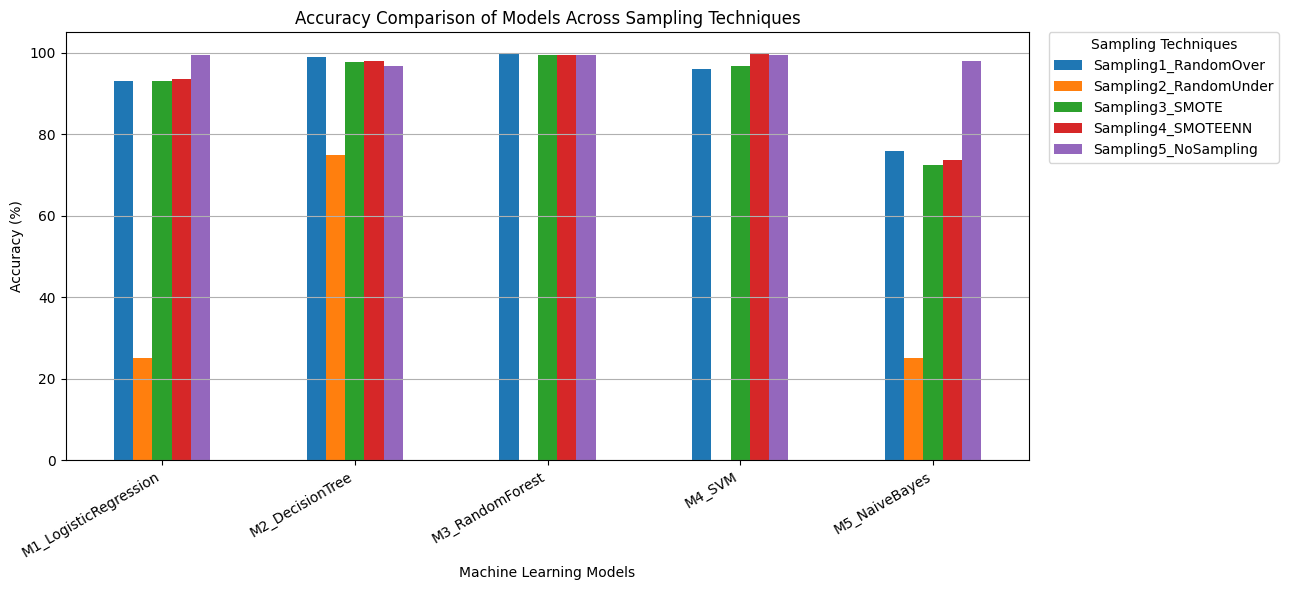

In [20]:
results_df.plot(
    kind="bar",
    figsize=(13, 6)
)

plt.title("Accuracy Comparison of Models Across Sampling Techniques")
plt.xlabel("Machine Learning Models")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=30, ha="right")
plt.grid(axis="y")

plt.legend(
    title="Sampling Techniques",
    bbox_to_anchor=(1.02, 1),
    loc="upper left",
    borderaxespad=0
)

plt.tight_layout()
plt.savefig("./model_comparison.png", bbox_inches="tight")
plt.show()

